# Package Installation


Please run following command in case any package is missing


In [ ]:
pip install scikit-learn #Sklearn Libraries

In [ ]:
pip install numpy #Numpy Libraries


In [ ]:
pip install pandas #Pandas Libraries

In [ ]:
pip install Matplotlib #matplotlib libraries

# House Price Prediction Using Machine Learning

In [ ]:
# Import necessary libraries
#Numpy and pandas for data manupulation
import numpy as np
import pandas as pd
#sklearn library for machine learning function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#graph Visualisation using matplot
import matplotlib.pyplot as plt


In [ ]:

# Generate your dataset
np.random.seed(0)
num_samples = 100

area = np.random.randint(500, 3000, num_samples)

bedrooms = np.random.randint(1, 6, num_samples)

prices = np.round(100000 + 300 * area + 20000 * bedrooms
                  + np.random.normal(0, 10000, num_samples),2)

#Create a DataFrame and save as Csv
data = pd.DataFrame({'Area': area, 'Bedrooms': bedrooms,
                     'Price': prices})
data.to_csv('house_prices_dataset.csv', index=True)


   Unnamed: 0  Area  Bedrooms      Price
0           0  2153         4  825665.20
1           1  1335         4  581394.22
2           2  1263         3  532956.73
3           3  2231         4  848243.03
4           4  1533         5  667327.96
Line of Regression: Price = 298.30 * Area + 20330.96 * Bedrooms + 102417.70

Model Evaluation:
Mean Squared Error: 99438082.93806651
R-squared: 0.9969217811718599


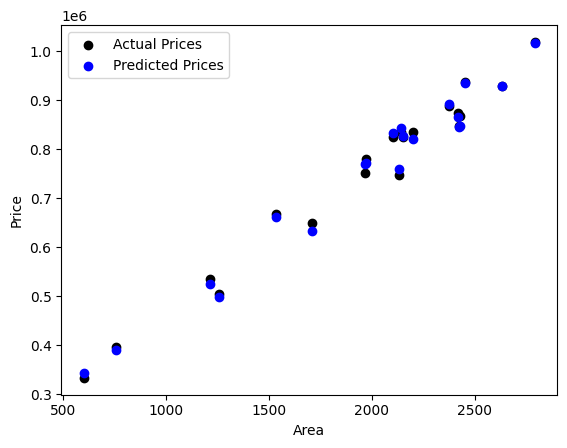

In [ ]:
#importing CSV file
data= pd.read_csv("house_prices_dataset.csv",header=0)
# Print the dataset
#print("Generated Dataset and Description:")
print(data.head(5))
#print(data.describe())
# Split the dataset into training and testing sets
X = data[['Area', 'Bedrooms']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Extract coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Print the line of regression equation
print(f'Line of Regression: Price = {slope:.2f} * Area + {model.coef_[1]:.2f} * Bedrooms + {intercept:.2f}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predictions
plt.scatter(X_test['Area'], y_test, color='black',
            label='Actual Prices')
plt.scatter(X_test['Area'], y_pred, color='blue',
            label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# Get user input for prediction
user_area = float(input("Enter the area (in sq. ft): "))
user_bedrooms = int(input("Enter the number of bedrooms: "))

# Make prediction using user input
user_input = pd.DataFrame({'Area': [user_area], 'Bedrooms': [user_bedrooms]})
predicted_price = model.predict(user_input)

print(f'Predicted Price: ${predicted_price[0]:,.2f}')
